In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.NoisyClairvoyant import NoisyClairvoyant
%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [3, 2, 3, 1, 0] 2977.6345603840005 29.776345603840003


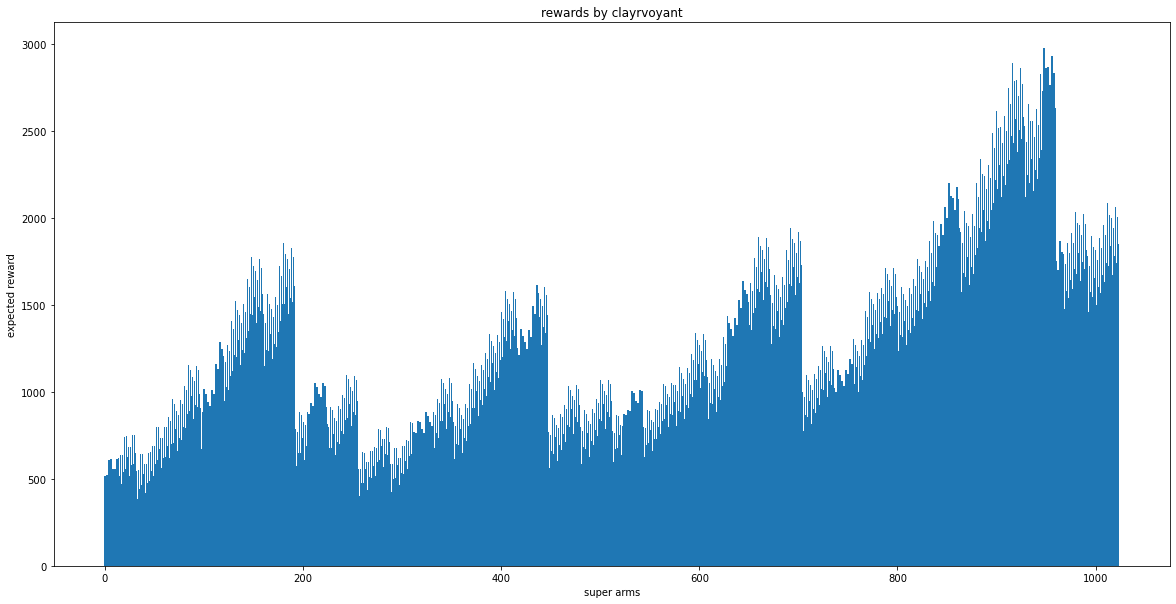

In [3]:
arms = list(rew_per_arm.keys())
indexes = []
for i, a in enumerate(arms):
    indexes.append(i)
rewards = list(rew_per_arm.values())

plt.figure(figsize=(20,10))
plt.bar(indexes, rewards, width=1.2)
plt.xlabel("super arms")
plt.ylabel("expected reward")
plt.title("rewards by clayrvoyant")
plt.show()

In [4]:
n_arms = 4
n_products = 5

TIME_HORIZON = 300
NUM_ITERATION = 1

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
            
        super_arm = gr_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
        
        
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [                              ] 0.0%[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 1]
[0, 0]
[0, 1, 0, 0, 1]
[0, 0, 0]
[0, 1, 0, 1, 1]
[0, 0, 0, 0]
[0, 2, 0, 1, 1]
[0, 0, 0, 0, 0]
[1, 2, 0, 1, 1]
[0, 0, 0, 0, 0, 0]
[1, 2, 0, 2, 1]
[0, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loading: [=                             ] 3.3%[2, 3, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7]
[3, 3, 1, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6]
[3, 3, 2, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8]
[3, 3, 1, 2,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7]
loading: [============                  ] 40.0%[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7, 5, 7, 5, 8, 11, 3, 7, 7, 5, 8, 3, 6, 10, 8, 5, 8, 7, 9, 9, 4, 5, 4, 6, 9, 10, 7, 6, 7, 4, 5, 6, 8, 7, 4, 6, 7, 8]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7, 5, 7, 5, 8, 11, 3, 7, 7, 5, 8, 3, 6, 10, 8, 5, 8, 7, 9, 9, 4, 5, 4, 6, 9, 10, 7, 6, 7, 4, 5, 6, 8, 7, 4, 6, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7, 5, 7, 5, 8, 11, 3, 7, 7, 5, 8, 3, 6, 10, 8, 5, 8, 7, 9, 9, 4, 5, 4, 6, 9, 10, 7, 6, 7, 4, 5, 6, 8, 7, 4, 6, 7, 8, 12, 7, 6, 11, 11, 6, 6, 3, 3, 5, 8, 4, 7, 6, 2, 4, 4, 8, 8, 6, 3, 9, 9, 7, 6, 9, 7, 4, 10, 5, 5, 10, 10, 8, 9, 18, 7, 14, 7]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7, 5, 7, 5, 8, 11, 3, 7, 7, 5, 8, 3, 6, 10, 8, 5, 8, 7, 9, 9, 4, 5, 4, 6, 9, 10, 7, 6, 7, 4, 5, 6, 8, 7, 4, 6, 7, 8, 12, 7, 6, 11, 11, 6, 6, 3, 3, 5, 8, 4, 7, 6, 2, 4, 4, 8, 8, 6, 3, 9, 9, 7, 6, 9, 7, 4, 10, 5, 5, 10, 10, 8, 9, 18, 7, 14, 7, 4, 6, 7, 11, 11, 7, 7, 10, 9, 6, 7, 5, 7, 5, 7, 9, 8, 8, 7, 10, 11, 3, 8, 7, 7, 10, 6, 9, 12, 7, 6, 6, 4, 11, 4, 10, 8, 5, 4, 4, 7, 6, 6]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6, 9, 9, 9, 10, 2, 7, 8, 9, 5, 7, 12, 5, 4, 6, 10, 6, 12, 10, 3, 7, 7, 9, 7, 9, 5, 8, 10, 3, 7, 7, 3, 8, 6, 11, 4, 9, 10, 7, 9, 8, 13, 8, 11, 9, 9, 5, 8, 7, 9, 7, 2, 7, 6, 6, 10, 10, 4, 5, 5, 5, 11, 7, 6, 5, 5, 9, 10, 5, 5, 5, 3, 13, 6, 9, 12, 10, 3, 5, 6, 10, 6, 7, 8, 7, 8, 9, 3, 8, 10, 8, 5, 9, 5, 7, 5, 7, 5, 8, 11, 3, 7, 7, 5, 8, 3, 6, 10, 8, 5, 8, 7, 9, 9, 4, 5, 4, 6, 9, 10, 7, 6, 7, 4, 5, 6, 8, 7, 4, 6, 7, 8, 12, 7, 6, 11, 11, 6, 6, 3, 3, 5, 8, 4, 7, 6, 2, 4, 4, 8, 8, 6, 3, 9, 9, 7, 6, 9, 7, 4, 10, 5, 5, 10, 10, 8, 9, 18, 7, 14, 7, 4, 6, 7, 11, 11, 7, 7, 10, 9, 6, 7, 5, 7, 5, 7, 9, 8, 8, 7, 10, 11, 3, 8, 7, 7, 10, 6, 9, 12, 7, 6, 6, 4, 11, 4, 10, 8, 5, 4, 4, 7, 6, 6, 8, 3, 13, 8, 8, 4, 7, 4, 7, 4, 10, 6, 5, 11, 10, 6, 11, 5, 7, 8, 7, 9, 7, 12, 6, 8, 5, 10, 10, 5, 7, 6, 9, 8, 3, 5, 5, 7, 7, 8, 9, 10, 8, 12, 5, 5]
[3, 3, 1, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 4, 4, 10, 6, 8, 5, 4, 5, 8, 5, 6, 6

(1, 300)

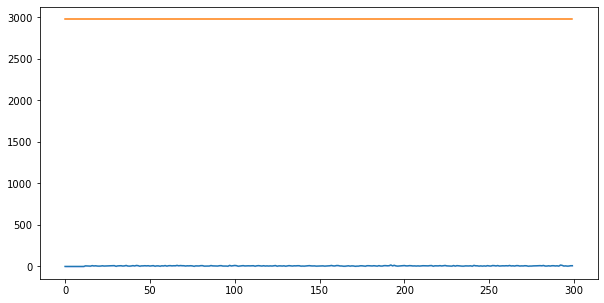

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

In [7]:
rewards_iterations

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  6,  4,  4,
        10,  6,  8,  5,  4,  5,  8,  5,  6,  6,  9,  9,  9, 10,  2,  7,
         8,  9,  5,  7, 12,  5,  4,  6, 10,  6, 12, 10,  3,  7,  7,  9,
         7,  9,  5,  8, 10,  3,  7,  7,  3,  8,  6, 11,  4,  9, 10,  7,
         9,  8, 13,  8, 11,  9,  9,  5,  8,  7,  9,  7,  2,  7,  6,  6,
        10, 10,  4,  5,  5,  5, 11,  7,  6,  5,  5,  9, 10,  5,  5,  5,
         3, 13,  6,  9, 12, 10,  3,  5,  6, 10,  6,  7,  8,  7,  8,  9,
         3,  8, 10,  8,  5,  9,  5,  7,  5,  7,  5,  8, 11,  3,  7,  7,
         5,  8,  3,  6, 10,  8,  5,  8,  7,  9,  9,  4,  5,  4,  6,  9,
        10,  7,  6,  7,  4,  5,  6,  8,  7,  4,  6,  7,  8, 12,  7,  6,
        11, 11,  6,  6,  3,  3,  5,  8,  4,  7,  6,  2,  4,  4,  8,  8,
         6,  3,  9,  9,  7,  6,  9,  7,  4, 10,  5,  5, 10, 10,  8,  9,
        18,  7, 14,  7,  4,  6,  7, 11, 11,  7,  7, 10,  9,  6,  7,  5,
         7,  5,  7,  9,  8,  8,  7, 10, 11,  3,  8,  7,  7, 10, 